In [1]:
import glob
import os
import pandas as pd
import numpy as np
import datetime as dt
import dataretrieval as nwis
from tqdm import tqdm

In [ ]:
path = "../data/pnwNP_modeledData/"
files = glob.glob(path+'*.csv')


dvstats = pd.DataFrame(columns= ['gage','numZero','numOne','propZero','propOne','startDate','endDate'])

for i in tqdm(range(len(files))):
    # print(i)
    df = pd.read_csv(files[i])
    df['streamflow_NWIS'] = np.round(df['streamflow_NWIS'],1)
    dvstats.loc[i] = (df["gage"][0],
                      len(df[df["streamflow_NWIS"]==0]),
                      len(df[(df["streamflow_NWIS"]<=1) & (df["streamflow_NWIS"]>0)]),
                      len(df[df["streamflow_NWIS"]==0])/len(df),
                      len(df[(df["streamflow_NWIS"]<=1) & (df["streamflow_NWIS"]>0)])/len(df),
                      df["time"].iloc[0],
                      df["time"].iloc[-1])
    del(df)

# dvstats.to_csv("../data/pnwNWall_DailyStats_newROUNDED240317.csv")

In [115]:
pnwNPall = pd.read_csv("../data/pnwNPall_InfowStats.csv")
siteID = list(pnwNPall['gage'].astype(str))
df = nwis.get_info(sites = siteID)[0]
dvstats = pd.read_csv("../data/pnwNWall_DailyStats_newROUNDED240317.csv")

In [116]:
df = df[['site_no','dec_lat_va','dec_long_va']]
df['site_no'] = df['site_no'].astype(np.int64)
df = pd.merge(df,dvstats, right_on='gage',left_on='site_no',how='inner')
df['numObs'] = pd.to_datetime(df['endDate']) - pd.to_datetime(df['startDate'])
df['numObs'] = df['numObs'].dt.days
df['propZero'] = df['numZero']/df['numObs']
df['propOne'] = df['numOne']/df['numObs']
df.to_csv("../data/pnwNP_StatsLocations.csv",index=False)

In [2]:
df = pd.read_csv("../data/pnwNP_StatsLocations.csv")

In [38]:
tt = df[(df["startDate"]<= "1993-01-01")&(df["endDate"]>= "2011-12-31")]

array([[<Axes: title={'center': 'numObs'}>]], dtype=object)

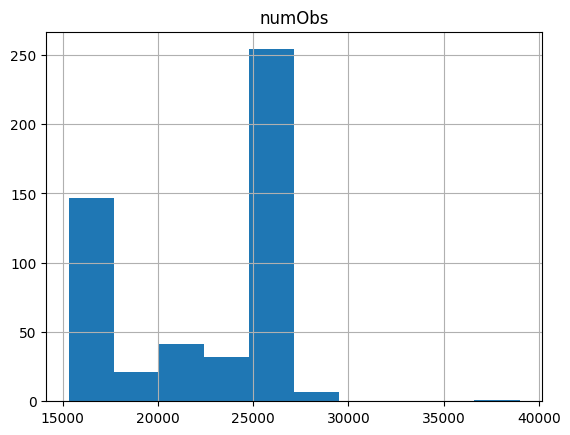

In [40]:
tt.hist("numObs")

In [5]:
fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(df.gage, df.days_start_to_end, left=df.start_num)
plt.show()

,site_no,dec_lat_va,dec_long_va,Unnamed: 0,gage,numZero,numOne,propZero,propOne,startDate,endDate,numObs
0,10361700,41.722116,-119.373258,0,10361700,3237,49,0.154799,0.002343,1963-10-01,2020-12-31,20911
1,10366000,42.072111,-119.962725,1,10366000,215,10682,0.008291,0.411923,1950-01-01,2020-12-31,25932
2,10378500,42.424883,-119.923285,2,10378500,3330,8447,0.128413,0.325737,1950-01-01,2020-12-31,25932
3,10389500,43.110973,-121.069165,3,10389500,4673,4049,0.231566,0.200644,1965-10-01,2020-12-31,20180
4,10390001,43.110973,-121.069165,4,10390001,274,6154,0.013578,0.304955,1965-10-01,2020-12-31,20180
...,...,...,...,...,...,...,...,...,...,...,...,...
498,14375400,42.031501,-123.737848,498,14375400,77,1260,0.005030,0.082305,1979-02-01,2020-12-31,15309
499,433247110491701,43.546317,-110.822154,499,433247110491701,53,58,0.003462,0.003789,1979-02-01,2020-12-31,15309
500,452755122234100,45.465120,-122.395923,500,452755122234100,1143,905,0.074662,0.059116,1979-02-01,2020-12-31,15309
501,452807122215001,45.468667,-122.363972,501,452807122215001,925,161,0.060422,0.010517,1979-02-01,2020-12-31,15309


In [36]:
df['startDate'] = pd.to_datetime(df['startDate'])
df['endDate'] = pd.to_datetime(df['endDate'])

# project start date
proj_start  = df.startDate.min()
# proj_start = "1993-01-01"

# number of days from project start to task start
df['start_num'] = (df.startDate-proj_start).dt.days

# number of days from project start to end of tasks
df['end_num'] = (df.endDate-proj_start).dt.days

# days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num

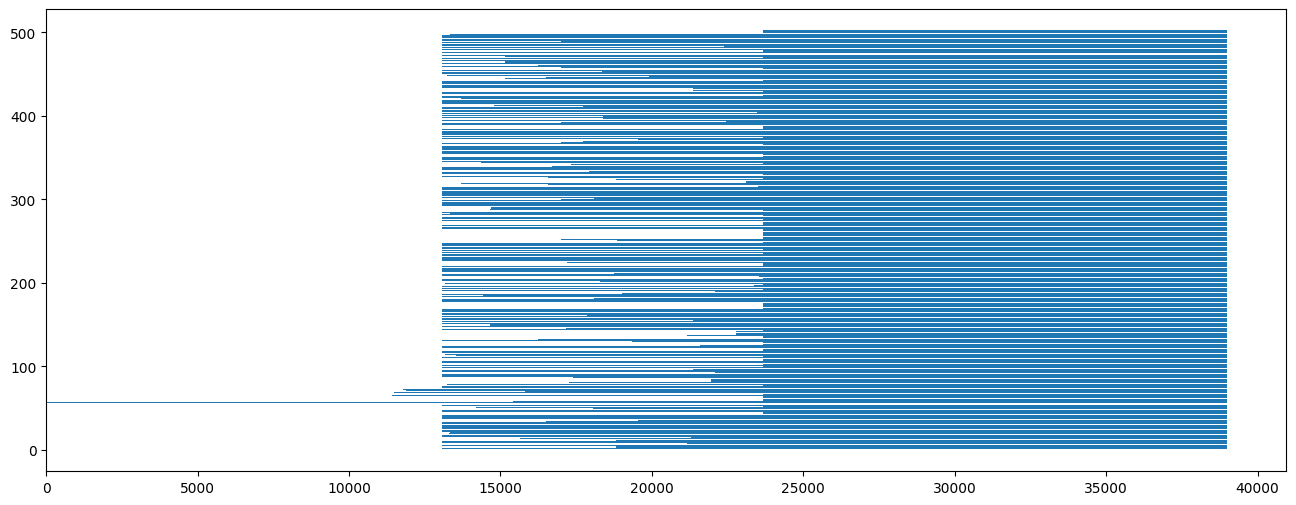

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(df.index, df.days_start_to_end, left=df.start_num)
plt.show()